In [1]:
import keras

C:\Users\Munna chowhan\Anaconda3\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.applications import VGG16

In [3]:
conv_base = VGG16(include_top=False,weights="imagenet",input_shape=(150, 150, 3))

In [4]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [5]:
import os

In [6]:
import numpy as np

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
train_dir = r"C:\Users\Munna chowhan\Downloads\cats_and_dogs_small_ds\train"
validation_dir = r"C:\Users\Munna chowhan\Downloads\cats_and_dogs_small_ds\validation"
test_dir = r"C:\Users\Munna chowhan\Downloads\cats_and_dogs_small_ds\test"

In [9]:
data_gen =ImageDataGenerator(rescale=1./255)
batch_size = 20

In [10]:
def extract_features(directory, sample_count):
    
    features = np.zeros(shape = (sample_count, 4, 4, 512))
    
    labels = np.zeros(shape=(sample_count))
    
    generator = data_gen.flow_from_directory(directory, target_size=(150, 150), batch_size = batch_size,class_mode="binary")
    
    i = 0
    
    for input_b, label_b in generator:
        
        features_batch = conv_base.predict(input_b)
        
        
        
        features[i * batch_size : ( i + 1)* batch_size ] = features_batch
        
        labels[i * batch_size : (i +1 )*  batch_size] = label_b
        
        i += 1
        
        if i * batch_size >= sample_count:
            
            break
    return features, labels

In [11]:
train_features, train_labels = extract_features(train_dir, sample_count=2000)

Found 2000 images belonging to 2 classes.


In [12]:
validation_features, validation_labels = extract_features(validation_dir, sample_count = 1000)

Found 1000 images belonging to 2 classes.


In [13]:
test_features, test_labels = extract_features(test_dir, sample_count = 1000)

Found 1000 images belonging to 2 classes.


In [29]:
train_features = np.reshape(train_features, (2000, 4*4*512))

In [30]:
validation_features = np.reshape(validation_features, (1000, 4*4*512))

In [31]:
test_features = np.reshape(test_features, (1000,  4* 4 *512))

In [32]:
from keras import models

In [33]:
from keras import layers

In [34]:
from keras import optimizers

In [35]:
model = models.Sequential()

In [36]:
model.add(layers.Dense(units = 256 , activation = "relu", input_dim =(4* 4* 512)))

In [37]:
model.add(layers.Dropout(rate = 0.5))

In [38]:
model.add(layers.Dense(units = 1, activation = "sigmoid"))

In [39]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss="binary_crossentropy",metrics = ["accuracy"])

In [42]:
history = model.fit(train_features, train_labels,batch_size=20, epochs=30,validation_data=(validation_features,validation_labels))


Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.5652 - acc: 0.7035 - val_loss: 0.4206 - val_acc: 0.8450
Epoch 2/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.4159 - acc: 0.8220 - val_loss: 0.3506 - val_acc: 0.8730
Epoch 3/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.3511 - acc: 0.8485 - val_loss: 0.3168 - val_acc: 0.8860
Epoch 4/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.3113 - acc: 0.8760 - val_loss: 0.2947 - val_acc: 0.8880
Epoch 5/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2859 - acc: 0.8875 - val_loss: 0.2825 - val_acc: 0.8900
Epoch 6/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2609 - acc: 0.9050 - val_loss: 0.2752 - val_acc: 0.8910
Epoch 7/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2377 - acc: 0.9065 - val_loss: 0.2645 - val_acc: 0.8920
Epoch 8/30
200

In [43]:
import  matplotlib.pyplot as plt

In [44]:
%matplotlib inline

In [45]:
acc = history.history["acc"]

In [46]:
val_acc = history.history["val_acc"]

In [47]:
loss = history.history["loss"]

In [48]:
val_loss = history.history["val_loss"]

In [49]:
epochs = range(1, len(acc) + 1)

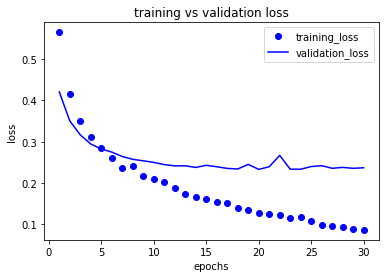

In [50]:
plt.plot(epochs,loss,"bo", label = "training_loss")
plt.plot(epochs, val_loss, "b", label = "validation_loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("training vs validation loss")
plt.show()

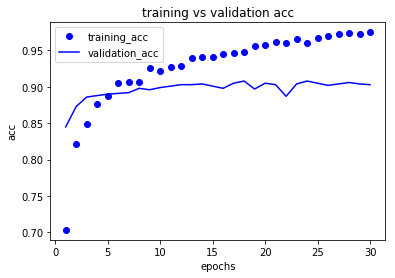

In [51]:
plt.plot(epochs,acc,"bo", label = "training_acc")
plt.plot(epochs, val_acc, "b", label = "validation_acc")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("acc")
plt.title("training vs validation acc")
plt.show()